# **Introduction to Statistics in Python**

## **Types of statistics**

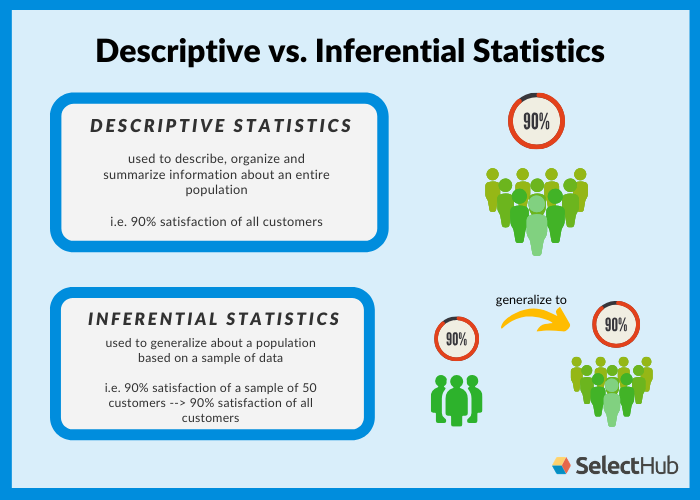

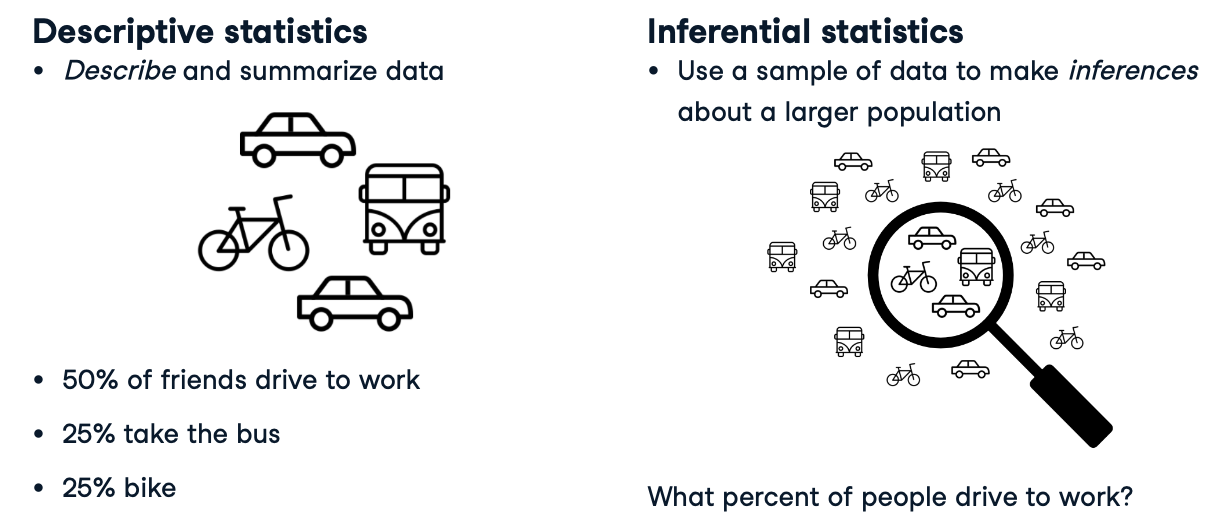

### **Descriptive statistics**
used for describing and summarizing the data at hand

### **Inferential statistics**
 uses the data at hand, which is called sample data, to make inferences about a larger population

## **Types of data**
this matters to deicide which types of summary statistics and visualizations make sense for the data

### **Numeric (Quantitative)**
the data is made up of numeric values

- summary statistics like mean, and plots like scatter plots make sense for this type of data

- summary statistics like count, and plots like bar plots **don't** make sense for this type of data

#### **Continuous (Measured)**
- Airplane speed
- Time spent waiting in line

#### **Discrete (Counted)**
- Number of pets
- Number of packages shipped

### **Categorical (Qualitative)**
the data is made up of values that belong to distinct groups

- can sometimes represent as number
- summary statistics like count, and plots like bar plots make sense for this type of data
- scatter plot **don't** make a ton of sense for categorical data


#### **Nominal (Unordered)**
categorical data is made up of categories with no inherent ordering
- Married/unmarried (1/0)
- Country of residence (1, 2, ...)

#### **Ordinal (Ordered)**
categorical data has an inherent order

**ex**: degree indicating how much you agree with a statement in a survey question

- Strongly disagree (1)
- Somewhat disagree (2)
- Neither agree nor disagree (3)
- Somewhat agree (4)
- Strongly agree (5)
